<a href="https://colab.research.google.com/github/raja045/Machine-Learning/blob/main/BinaryImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary Classification CAT or DOG

## Downloading the Dataset.


In [ ]:
# Create and download the new API Token in kaggle account section.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/



cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
! kaggle datasets download -d salader/dogs-vs-cats

#This will download the dataset from kaggle.

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:13<00:00, 140MB/s]
100% 1.06G/1.06G [00:13<00:00, 87.0MB/s]


Note: what is the need of this?
As the dataset is too large, if we upload the dataset in normal way.
So, it is recommended to download from the kaggle directly.

In [ ]:
# To unzip the file to the directory dataset.
# Note: what is the need of this?
# As the dataset is too large, if we upload the dataset in normal way.
# So, it is recommended to download from the kaggle directly.

!unzip /content/dogs-vs-cats.zip -d ./dataset

Streaming output truncated to the last 5000 lines.
  inflating: ./dataset/train/dogs/dog.4419.jpg  
  inflating: ./dataset/train/dogs/dog.442.jpg  
  inflating: ./dataset/train/dogs/dog.4420.jpg  
  inflating: ./dataset/train/dogs/dog.4421.jpg  
  inflating: ./dataset/train/dogs/dog.4422.jpg  
  inflating: ./dataset/train/dogs/dog.4424.jpg  
  inflating: ./dataset/train/dogs/dog.4425.jpg  
  inflating: ./dataset/train/dogs/dog.4426.jpg  
  inflating: ./dataset/train/dogs/dog.4427.jpg  
  inflating: ./dataset/train/dogs/dog.4431.jpg  
  inflating: ./dataset/train/dogs/dog.4433.jpg  
  inflating: ./dataset/train/dogs/dog.4436.jpg  
  inflating: ./dataset/train/dogs/dog.4438.jpg  
  inflating: ./dataset/train/dogs/dog.4439.jpg  
  inflating: ./dataset/train/dogs/dog.444.jpg  
  inflating: ./dataset/train/dogs/dog.4440.jpg  
  inflating: ./dataset/train/dogs/dog.4441.jpg  
  inflating: ./dataset/train/dogs/dog.4442.jpg  
  inflating: ./dataset/train/dogs/dog.4443.jpg  
  inflating: ./datas

## Importing Necessary libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

## Data Preprocessing


Generator function, batch the data according to the number of data.

In [ ]:
#generators
#Incase of large datasets, Generators function load the data in batches which reduces the load on the CPU.

train_dataset = keras.utils.image_dataset_from_directory(
    directory='/content/dataset/train',
    labels='inferred',
    label_mode='int',
    # Basically these labels set the values as 0 or 1,
    batch_size=32,
    #each batch will have 32 images.
    image_size=(256,256)
)
    # Images might not be in the same size. It will make them same size.)

test_dataset = keras.utils.image_dataset_from_directory(
    directory='/content/dataset/test',
    labels='inferred',
    label_mode='int',
     batch_size=32,
     image_size=(256,256)
 )

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


As the images are not in the same size, Make all the images into same size.

In [ ]:
# Normalize

def process(image, label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_dataset = train_dataset.map(process)
test_dataset = test_dataset.map(process)


## Creating a model

In [ ]:
# Create a CNN Model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))




In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])



## Training the model

In [ ]:
model.fit(train_dataset, epochs=10, validation_data = test_dataset)

Epoch 1/10
625/625 [==============================] - 62s 87ms/step - loss: 0.6829 - accuracy: 0.5653 - val_loss: 0.6337 - val_accuracy: 0.6512
Epoch 2/10
625/625 [==============================] - 51s 80ms/step - loss: 0.5832 - accuracy: 0.6912 - val_loss: 0.5228 - val_accuracy: 0.7442
Epoch 3/10
625/625 [==============================] - 57s 91ms/step - loss: 0.4535 - accuracy: 0.7858 - val_loss: 0.5452 - val_accuracy: 0.7464
Epoch 4/10
625/625 [==============================] - 52s 82ms/step - loss: 0.2855 - accuracy: 0.8769 - val_loss: 0.7460 - val_accuracy: 0.7306
Epoch 5/10
625/625 [==============================] - 54s 85ms/step - loss: 0.1389 - accuracy: 0.9449 - val_loss: 1.0887 - val_accuracy: 0.7276
Epoch 6/10
625/625 [==============================] - 51s 82ms/step - loss: 0.0911 - accuracy: 0.9681 - val_loss: 1.1197 - val_accuracy: 0.7334
Epoch 7/10
625/625 [==============================] - 52s 82ms/step - loss: 0.0559 - accuracy: 0.9826 - val_loss: 1.2195 - val_accuracy:

## Model Prediction

In [ ]:
# Predicting from UNknown source.
# Total Four Images, Dog 1 - looks like cat.
#cat 1 - looks like Dog.

import cv2
import matplotlib.pyplot as plt

In [ ]:
test_img = cv2.imread('/content/dog3.jpg')


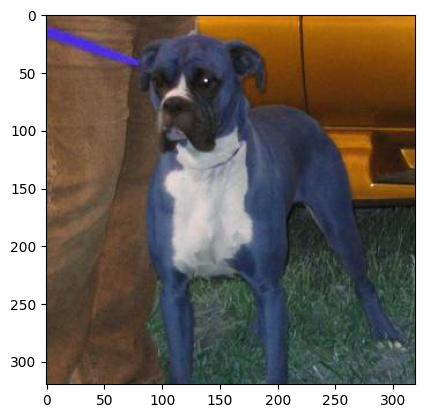

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(320, 319, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
# We are doing this because of batch.
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 33ms/step


array([[1.]], dtype=float32)